In [26]:
!pip install biopython
from Bio.Seq import Seq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.5 MB/s eta 0:00:00


# **BA4B:** Find Substrings of a Genome Encoding a Given Amino Acid String

There are three different ways to divide a DNA string into codons for translation, one starting at each of the first three starting positions of the string. These different ways of dividing a DNA string into codons are called reading frames. Since DNA is double-stranded, a genome has six reading frames (three on each strand), as shown in Figure 1.

We say that a DNA string Pattern encodes an amino acid string Peptide if the RNA string transcribed from either Pattern or its reverse complement Pattern translates into Peptide.

In [27]:
def subStrings(dna,peptide):
  c = len(peptide)*3
  seq = Seq(peptide)
  for i in range(len(dna)-c+1):
    pattern = dna[i:i+c]
    pattern_protein = Seq(pattern).translate()
    rc = Seq(pattern).reverse_complement()
    pattern_r_protein = rc.translate()
    if seq==pattern_protein or seq==pattern_r_protein:
      print(pattern)

dna = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
peptide = "MA"
subStrings(dna,peptide)

ATGGCC
GGCCAT
ATGGCC


# **BA4C:** Generate the Theoretical Spectrum of a Cyclic Peptide
The workhorse of peptide sequencing is the mass spectrometer, an expensive molecular scale that shatters molecules into pieces and then weighs the resulting fragments. The mass spectrometer measures the mass of a molecule in daltons (Da); 1 Da is approximately equal to the mass of a single nuclear particle (i.e., a proton or neutron).

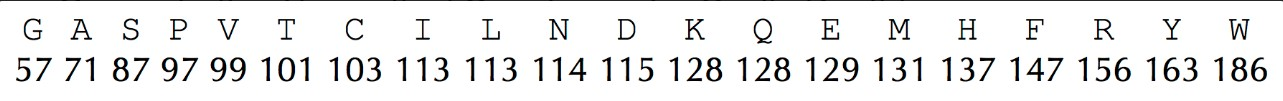

We will approximate the mass of a molecule by simply adding the number of protons and neutrons found in the molecule’s constituent atoms, which yields the molecule’s integer mass. For example, the amino acid "Gly", which has chemical formula C2H3ON, has an integer mass of 57, since 2·12 + 3·1 + 1·16 + 1·14 = 57. Yet 1 Da is not exactly equal to the mass of a proton/neutron, and we may need to account for different naturally occurring isotopes of each atom when weighing a molecule. As a result, amino acids typically have non-integer masses (e.g., "Gly" has total mass equal to approximately 57.02 Da); for simplicity, however, we will work with the integer mass table given in Figure 1.

The theoretical spectrum of a cyclic peptide Peptide, denoted Cyclospectrum(Peptide), is the collection of all of the masses of its subpeptides, in addition to the mass 0 and the mass of the entire peptide. We will assume that the theoretical spectrum can contain duplicate elements, as is the case for "NQEL" (shown in Figure 2), where "NQ" and "EL" have the same mass.

In [28]:
m = {
    'G':57,
    'A':71,
    'S':87,
    'P':97,
    'V':99,
    'T':101,
    'C':103,
    'I':113,
    'L':113,
    'N':114,
    'D':115,
    'K':128,
    'Q':128,
    'E':129,
    'M':131,
    'H':137,
    'F':147,
    'R':156,
    'Y':163,
    'W':186
}

def calculate_weight(peptide):
  w = 0
  for i in range(len(peptide)):
    w+=m[peptide[i]]
  return w


def spectrums(peptide):
  arr = [0]
  arr.append(calculate_weight(peptide))
  k = len(peptide)
  for i in range(1,k):
    s = peptide + peptide[:i-1]
    for j in range(len(peptide)):
      sub = s[j:j+i]
      w = calculate_weight(sub)
      arr.append(w)
  arr.sort()
  return arr


peptide = "LEQN"
spectrums(peptide)

[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]

In [29]:
# p = "ELNASPMMWGLVGM"
# t = spectrums(p)

# for i in range(len(t)):
#   if i == len(t)-1:
#     print(t[i])
#   else:
#     print(str(t[i])+' ',end="")

# **BA4D:** Compute the Number of Peptides of Given Total Mass

In “Generate the Theoretical Spectrum of a Cyclic Peptide”, we generated the theoretical spectrum of a known cyclic peptide. Although this task is relatively easy, our aim in mass spectrometry is to solve the reverse problem: we must reconstruct an unknown peptide from its experimental spectrum. We will start by assuming that a biologist is lucky enough to generate an ideal experimental spectrum Spectrum, which is one coinciding with the peptide’s theoretical spectrum. Can we reconstruct a peptide whose theoretical spectrum is Spectrum?

Denote the total mass of an amino acid string Peptide as Mass(Peptide). In mass spectrometry experiments, whereas the peptide that generated a spectrum is unknown, the peptide’s mass is typically known and is denoted ParentMass(Spectrum). Of course, given an ideal experimental spectrum, Mass(Peptide) is given by the largest mass in the spectrum.

A brute force approach to reconstructing a peptide from its theoretical spectrum would generate all possible peptides whose mass is equal to ParentMass(Spectrum) and then check which of these peptides has theoretical spectra matching Spectrum. However, we should be concerned about the running time of such an approach: how many peptides are there having mass equal to ParentMass(Spectrum)?

In [30]:
m = [57, 71, 87, 97, 99, 101, 103, 113, 114, 115, 128, 129, 131, 137, 147, 156, 163, 186]

def number_of_peptides(val):
  dp = [0]*(val+1)
  dp[0]=1
  for i in range(1,val+1):
    c = 0
    for n in m:
      if i-n>=0:
        c+=dp[i-n]
    dp[i]=c
  return dp[val]

number_of_peptides(1400)

464240419461956

# **BA4E:** Find a Cyclic Peptide with Theoretical Spectrum Matching an Ideal Spectrum
In “Compute the Number of Peptides of Given Total Mass”, we first encountered the problem of reconstructing a cyclic peptide from its theoretical spectrum; this problem is called the Cyclopeptide Sequencing Problem and is given below. It is solved by the following algorithm.


```
    CYCLOPEPTIDESEQUENCING(Spectrum)
        Peptides ← a set containing only the empty peptide
        while Peptides is nonempty
            Peptides ← Expand(Peptides)
            for each peptide Peptide in Peptides
                if Mass(Peptide) = ParentMass(Spectrum)
                    if Cyclospectrum(Peptide) = Spectrum
                        output Peptide
                    remove Peptide from Peptides
                else if Peptide is not consistent with Spectrum
                    remove Peptide from Peptides
```



In [31]:
a = [3]
print(a[0:1])

[3]


In [32]:
m = [57, 71, 87, 97, 99, 101, 103, 113, 114, 115, 128, 129, 131, 137, 147, 156, 163, 186]

def mass(peptide):
  return sum(peptide)

def expand(peptides):
  p = []
  for mass in m:
    for peptide in peptides:
      p.append(peptide+[mass])
  return p

def cyclo_spectrum(peptide):
  a = [0,mass(peptide)]
  for i in range(1,len(peptide)):
    s = peptide + peptide[:i-1]
    c = 0
    for j in range(len(peptide)):
      t = mass(s[j:i+j])
      a.append(t)
  a.sort()
  return a;

def is_consistant(peptide,spectrum):
  lis = []
  for i in range(len(peptide)):
    s = 0
    for j in range(i,len(peptide)):
      s+=peptide[j]
      lis.append(s)

  for val in lis:
    if val not in spectrum:
      return False
  return True


def cyclo_peptide_sequencing(spectrum):
  parent_mass = spectrum[-1]
  peptides = [[]]
  ans = []
  while peptides:
    peptides = expand(peptides)
    for peptide in peptides:
      if mass(peptide)==parent_mass:
        x = cyclo_spectrum(peptide)
        if x == spectrum:
          ans.append(peptide)
        peptides = [p for p in peptides if p!=peptide]
      elif not is_consistant(peptide,spectrum):
        peptides = [ p for p in peptides if p!=peptide]
  return ans

p = cyclo_peptide_sequencing([0,113,128,186,241,299,314,427])

for item in p:
  item = [str(val) for val in item ]
  print('-'.join(item),end=" ")

186-128-113 128-186-113 186-113-128 113-186-128 128-113-186 113-128-186 

In [33]:
# t = []
# with open('index.txt','r') as f:
#   line = f.read()
#   s = line.strip().split()
#   s = [int(val) for val in s]
#   t = cyclo_peptide_sequencing(s)

# for item in t:
#   item = [str(val) for val in item ]
#   print('-'.join(item),end=" ")

# **BA4F:** Compute the Score of a Cyclic Peptide Against a Spectrum

To generalize the Cyclopeptide Sequencing Problem from “Find a Cyclic Peptide with Theoretical Spectrum Matching an Ideal Spectrum” to handle noisy spectra, we need to relax the requirement that a candidate peptide’s theoretical spectrum must match the experimental spectrum exactly, and instead incorporate a scoring function that will select the peptide whose theoretical spectrum matches the given experimental spectrum the most closely. Given a cyclic peptide Peptide and a spectrum Spectrum, we define Score(Peptide, Spectrum) as the number of masses shared between Cyclospectrum(Peptide) and Spectrum. Recalling our example above, if

>Spectrum = {0, 99, 113, 114, 128, 227, 257, 299, 355, 356, 370, 371, 484},
then Score(NQEL, Spectrum) = 11.

The scoring function should take into account the multiplicities of shared masses, i.e., how many times they occur in each spectrum. For example, suppose that Spectrum is the theoretical spectrum of NQEL; for this spectrum, mass 242 has multiplicity 2. If 242 has multiplicity 1 in the theoretical spectrum of Peptide, then 242 contributes 1 to Score(Peptide, Spectrum). If 242 has larger multiplicity in the theoretical spectrum of Peptide, then 242 contributes 2 to Score(Peptide, Spectrum).

In [34]:
#compare experimental spectrum with theoritical spectrum

m = {
    'G':57,
    'A':71,
    'S':87,
    'P':97,
    'V':99,
    'T':101,
    'C':103,
    'I':113,
    'L':113,
    'N':114,
    'D':115,
    'K':128,
    'Q':128,
    'E':129,
    'M':131,
    'H':137,
    'F':147,
    'R':156,
    'Y':163,
    'W':186
}

def t_mass(peptide):
  c = 0
  for i in range(len(peptide)):
    c+=m[peptide[i]]
  return c

def get_theoritical_spectrum(peptide):
  masses = [0,t_mass(peptide)]
  for i in range(1,len(peptide)):
    s = peptide + peptide[:i-1]
    for j in range(len(peptide)):
      sub_peptide = s[j:j+i]
      # print(sub_peptide)
      mass = t_mass(sub_peptide)
      masses.append(mass)
  return sorted(masses)


def score_calculate(peptide,e_spectrum):
  s = get_theoritical_spectrum(peptide)
  c = 0
  for item in s:
    t_count = s.count(item)
    e_count = e_spectrum.count(item)
    c+= min(t_count,e_count)
  return c


peptide = "NQEL"
e_spectrum = [0,99,113,114,128,227,257,299,355,356,370,371,484]

score_calculate(peptide,e_spectrum)

11

In [35]:
# t = 0
# with open('in1.txt','r') as f:
#   line = f.read()
#   s = line.strip().split()
#   s = [ int(a) for a in s]
#   t = score_calculate('FVNMIGFFWYTRYCGSFFTGLMYWETKIDWSEPCCVYCWSKHS',s)
#   print(t)

# **BA4H:** Generate the Convolution of a Spectrum

We define the convolution of a cyclic spectrum by taking all positive differences of masses in the spectrum. Figure 1 shows the convolution of the theoretical spectrum of "NQEL".

As predicted, some of the values in Figure 2.12 appear more frequently than others. For example, 113 (the mass of "L") appears eight times in the convolution of the theoretical spectrum of "NQEL"; we say that 113 has multiplicity 8. Six of the eight occurrences of 113 correspond to subpeptide pairs differing in an "L": "L" and ""; "LN" and "N"; "EL" and "E"; "LNQ" and "NQ"; "QEL" and "QE"; "NQEL" and "NQE".

In [36]:
# def custom_sort(item):
#   return(-item[0],item[1])

def convolution(spectrum):
  spectrum.sort()
  diff = {}
  for i in range(len(spectrum)-1):
    for j in range(i+1,len(spectrum)):
      t = spectrum[j]-spectrum[i]
      if t>0:
        if t in diff:
          diff[t]+=1
        else:
          diff[t]=1
  arr = []
  for key,v in diff.items():
    arr.append([v,key])
  arr.sort(reverse = True)
  conv = []
  for item in arr:
    for j in range(item[0]):
      conv.append(item[1])
  return conv

spectrums = [0,137,186,323]
convolution(spectrums)

[186, 186, 137, 137, 323, 49]

In [37]:
# t = []
# with open('in.txt','r') as f:
#   line = f.read()
#   s = line.strip().split()
#   s = [ int(a) for a in s]
#   t = convolution(s)

# for x in t:
#   print(x,end=" ")

